# Project Luther

## Looking at Steam data to predict several factors on user rating


In [1]:
#The basics
import numpy as np
import pandas as pd

#Get them web sites
import requests

#Make sure selenium works
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os

#Start the google driver
chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

In [20]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#make sure to get a consistent table
import pickle
#need to pick apart strings
import re
import patsy

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### The following code is listed for reference. The main table was created on 4/21/2018. Running the code may alter the results.

## Selenium is used to scrape data from steamspy and steam.

In [3]:
"""#Chrome driver is used to load Steamspy
driver = webdriver.Chrome(chromedriver)
driver.get('https://steamspy.com')"""

"#Steamspy driver\ndriver = webdriver.Chrome(chromedriver)\ndriver.get('https://steamspy.com')"

In [4]:
"""#scrapes four pages of steamspy trending games for tables
#Data is scrapped on 4/21/2018
f = []
for i in range(4):
    i = driver.find_element_by_id('trendinggames')
    my_df = pd.read_html(driver.page_source)[0]
    i = i.text
    i = i.splitlines()
    i = i[5:]
    f.append(my_df)
    site = driver.find_element_by_xpath('//*[@id="trendinggames_next"]/a')
    site.click()
    time.sleep(1)"""
    

'#scrapes four pages of steamspy for tables\n#Data is scrapped on 4/21/2018\nf = []\nfor i in range(4):\n    i = driver.find_element_by_id(\'trendinggames\')\n    my_df = pd.read_html(driver.page_source)[0]\n    i = i.text\n    i = i.splitlines()\n    i = i[5:]\n    f.append(my_df)\n    site = driver.find_element_by_xpath(\'//*[@id="trendinggames_next"]/a\')\n    site.click()\n    time.sleep(1)'

In [5]:
"""#sanity check
pd.read_html(driver.page_source)[0]"""

'#sanity check\npd.read_html(driver.page_source)[0]'

In [6]:
"""#Stacks the data and corrects the index issues
games_data = pd.concat(f)
games_data = games_data.reset_index()"""

'#Stacks the data and corrects the index issues\ngames_data = pd.concat(f)\ngames_data = games_data.reset_index()'

In [7]:
"""#pickles the data for later
games_data.to_pickle('/Users/NickThomas/Project_Luther/data/games_data.pkl')"""

"#pickles the data for later\ngames_data.to_pickle('/Users/NickThomas/Project_Luther/data/games_data.pkl')"

## Let's load the pickled data and conduct EDA

In [8]:
#pickle sucessfully loaded
with open('/Users/NickThomas/Project_Luther/data/games_data.pkl', 'rb') as pickle_file:
        games_data_loaded = pickle.load(pickle_file)
games_data_loaded

,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners
0,0,1,Friday the 13th: Killer Puzzle,"Apr 12, 2018",Free,90% (95%),"100,000 .. 200,000"
1,1,2,Radical Heights,"Apr 10, 2018",Free,11% (57%),"1,000,000 .. 2,000,000"
2,2,3,Farm Manager 2018,"Apr 6, 2018",$19.99,19% (65%),"20,000 .. 50,000"
3,3,4,Mirror,"Apr 19, 2018",$1.19,93% (96%),"200,000 .. 500,000"
4,4,5,Minit,"Apr 3, 2018",$9.99,87% (94%/81%),"0 .. 20,000"
5,5,6,Welcome to the Game II,"Apr 3, 2018",$9.99,38% (79%),"0 .. 20,000"
6,6,7,PC Building Simulator,"Mar 27, 2018",$19.99,73% (91%),"50,000 .. 100,000"
7,7,8,PixARK,"Mar 27, 2018",$24.99,19% (65%),"100,000 .. 200,000"
8,8,9,Far Cry 5,"Mar 26, 2018",$59.99,26% (71%),"500,000 .. 1,000,000"
9,9,10,PWND,"Apr 6, 2018",Free,28% (73%),"100,000 .. 200,000"


In [9]:
# provides basic info on the dataframe
games_data_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
index                                100 non-null int64
#                                    100 non-null int64
Game                                 100 non-null object
Release date                         100 non-null object
Price                                100 non-null object
Score rank(Userscore / Metascore)    100 non-null object
Owners                               100 non-null object
dtypes: int64(2), object(5)
memory usage: 5.5+ KB


In [10]:
#The value counts shows a high number of missing values for the user rating in the steam spy table
games_data_loaded['Score rank(Userscore / Metascore)'].value_counts()

N/A (N/A)        64
19% (65%)         2
73% (91%)         2
50% (84%)         2
69% (90%)         2
93% (96%)         2
N/A (N/A/54%)     1
59% (87%)         1
38% (79%)         1
16% (62%)         1
N/A (N/A/77%)     1
11% (57%)         1
26% (71%)         1
56% (86%)         1
56% (86%/81%)     1
62% (88%)         1
47% (83%)         1
18% (64%)         1
43% (81%)         1
52% (85%)         1
50% (84%/79%)     1
90% (95%/89%)     1
21% (67%)         1
20% (66%)         1
N/A (N/A/65%)     1
87% (94%/81%)     1
27% (72%)         1
90% (95%)         1
22% (68%)         1
28% (73%)         1
50% (84%/81%)     1
65% (89%)         1
Name: Score rank(Userscore / Metascore), dtype: int64

## Additional data is gathered from Steam

Due to the complexity of the steam website and the fact that the data frame has 100 cases, searches for games were conducted manually while code was used to scrape each steam entry. pages were scrapped on 4/22/2018. Again the following code is listed for reference and results may change if rerun.

In [11]:
"""# A games list is created for reference when making searches
game_list = [games_data_loaded.Game.unique()]
game_list"""

[array(['Friday the 13th: Killer Puzzle', 'Radical Heights',
        'Farm Manager 2018', 'Mirror', 'Minit', 'Welcome to the Game II',
        'PC Building Simulator', 'PixARK', 'Far Cry 5', 'PWND', 'Jalopy',
        'Ni no Kuni II: Revenant Kingdom',
        'Golfing Over It with Alva Majo', 'Fatal Twelve',
        'Lobotomy Corporation | Monster Management Simulation',
        'The Curse of Monkey Island', 'SINISTRY SILINIUM',
        'Devil May Cry HD Collection', 'Sword With Sauce',
        'Darwin Project', 'Train Valley 2', 'For The King',
        "Otaku's Fantasy 2", 'AI Escort', 'Maelstrom', 'Extinction',
        'Cryptocurrency Clicker', 'Find someone else', 'Deployment',
        'Band of Defenders', "Healer's Quest", 'Hakuoki: Edo Blossoms / /',
        'Broken Ground', 'blue.', 'Achievement Idler: Black',
        'Dungeon Of Zaar - Open Beta', 'TT Isle of Man',
        'Road Scars: Origins', 'RUSSIA HORROR 20!8', 'Amorous',
        'Ys VIII: Lacrimosa of DANA / VIII-Lacrimos

In [12]:
"""# Chrome driver is loaded with the first entry in the list
driver = webdriver.Chrome(chromedriver)
driver.get('http://store.steampowered.com/search')
search = driver.find_element_by_xpath('//*[@id="term"]')
search.click()
search.send_keys("Friday the 13th: Killer Puzzle")
search.send_keys(Keys.RETURN)"""

'# Chrome driver is loaded with the first entry in the list\ndriver = webdriver.Chrome(chromedriver)\ndriver.get(\'http://store.steampowered.com/search\')\nsearch = driver.find_element_by_xpath(\'//*[@id="term"]\')\nsearch.click()\nsearch.send_keys("Friday the 13th: Killer Puzzle")\nsearch.send_keys(Keys.RETURN)'

In [13]:
"""# blank lists are created for incoming variables
list3 = []
list6 = []
list7 = []"""

'# blank lists are created for incoming variables\nlist3 = []\nlist6 = []\nlist7 = []'

In [14]:
"""# Elements are found by their XPATHs. Regular expresions are used to split a review string
#into user reviews as a percentage and the amount of people who leave reviews.
#Back up code is created if the game has no downloadable content(DLC)
rating = driver.find_element_by_xpath('//*[@id="game_highlights"]/div[1]/div/div[3]/div/div[1]')
a = rating.text
cost_dlc = driver.find_element_by_xpath('//*[@id="dlc_purchase_action"]/div[1]')
c = cost_dlc.text
#c = np.nan
f = re.compile(r'\d+\%')
g = re.findall(f, str(a))
h = re.compile(r'(?<=the\s).*(?=\suser)')
j = re.findall(h, str(a))
print(a)
print(c)
print(g)
print(j)"""

'# Elements are found by their XPATHs. Regular expresions are used to split a review string\n#into user reviews as a percentage and the amount of people who leave reviews.\n#Back up code is created if the game has no downloadable content(DLC)\nrating = driver.find_element_by_xpath(\'//*[@id="game_highlights"]/div[1]/div/div[3]/div/div[1]\')\na = rating.text\ncost_dlc = driver.find_element_by_xpath(\'//*[@id="dlc_purchase_action"]/div[1]\')\nc = cost_dlc.text\n#c = np.nan\nf = re.compile(r\'\\d+\\%\')\ng = re.findall(f, str(a))\nh = re.compile(r\'(?<=the\\s).*(?=\\suser)\')\nj = re.findall(h, str(a))\nprint(a)\nprint(c)\nprint(g)\nprint(j)'

In [15]:
"""# Information from each page is appended to a list.
list3.append(c)
list6.append(g)
list7.append(j)
print(list3)
print(list6)
print(list7)"""

'# Information from each page is appended to a list.\nlist3.append(c)\nlist6.append(g)\nlist7.append(j)\nprint(list3)\nprint(list6)\nprint(list7)'

In [16]:
"""# Lists are converted to arrays
dlc_cost = np.asarray(list3)
user_rating = np.asarray(list6)
number_of_reviews = np.asarray(list7)"""

'# Lists are converted to arrays\ndlc_cost = np.asarray(list3)\nuser_rating = np.asarray(list6)\nnumber_of_reviews = np.asarray(list7)'

In [17]:
"""#A dataframe is created form the arrays
form = {'dlc_cost': dlc_cost, 'user_rating': user_rating, 'number_of_reviews': number_of_reviews}
add_df = pd.DataFrame(form)
add_df.head()"""

"A dataframe is created form the arrays\nform = {'dlc_cost': dlc_cost, 'user_rating': user_rating, 'number_of_reviews': number_of_reviews}\nadd_df = pd.DataFrame(form)\nadd_df.head()"

In [18]:
"""# Data is pickled
add_df.to_pickle('/Users/NickThomas/Project_Luther/data/add_df.pkl')"""

"# Data is pickled\nadd_df.to_pickle('/Users/NickThomas/Project_Luther/data/add_df.pkl')"

In [19]:
#Pickled data is opened
with open('/Users/NickThomas/Project_Luther/data/add_df.pkl', 'rb') as pickle_file:
        add_df = pickle.load(pickle_file)
add_df

,dlc_cost,number_of_reviews,user_rating
0,$18.89,"[1,184]",[95%]
1,$14.99,"[7,365]",[57%]
2,$12.95,[276],[62%]
3,$2.38,[982],[96%]
4,nan,[221],[94%]
5,nan,[389],[79%]
6,nan,"[1,983]",[91%]
7,nan,"[2,490]",[65%]
8,$39.98,"[16,281]",[70%]
9,nan,[564],[73%]


In [23]:
#The two dataframes are joined together
Steam_games_df = games_data_loaded.join(add_df)
Steam_games_df.head()

,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,dlc_cost,number_of_reviews,user_rating
0,0,1,Friday the 13th: Killer Puzzle,"Apr 12, 2018",Free,90% (95%),"100,000 .. 200,000",$18.89,"[1,184]",[95%]
1,1,2,Radical Heights,"Apr 10, 2018",Free,11% (57%),"1,000,000 .. 2,000,000",$14.99,"[7,365]",[57%]
2,2,3,Farm Manager 2018,"Apr 6, 2018",$19.99,19% (65%),"20,000 .. 50,000",$12.95,[276],[62%]
3,3,4,Mirror,"Apr 19, 2018",$1.19,93% (96%),"200,000 .. 500,000",$2.38,[982],[96%]
4,4,5,Minit,"Apr 3, 2018",$9.99,87% (94%/81%),"0 .. 20,000",nan,[221],[94%]


In [24]:
#Info is provided on the main data frame
Steam_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
index                                100 non-null int64
#                                    100 non-null int64
Game                                 100 non-null object
Release date                         100 non-null object
Price                                100 non-null object
Score rank(Userscore / Metascore)    100 non-null object
Owners                               100 non-null object
dlc_cost                             100 non-null object
number_of_reviews                    97 non-null object
user_rating                          86 non-null object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


In [108]:
mask = Steam_games_df.user_rating.dropna(how='all')
non_null_df = Steam_games_df[mask]
non_null_df

TypeError: unhashable type: 'list'

In [60]:
def convert_user_rating_to_string(Steam_games_df):
    rating_strings = []
    for rating in Steam_games_df['user_rating']:
        rating = ''.join(rating)
        rating_strings.append(rating)
    return rating_strings
    

#Steam_games_df['user_rating'].map(''.join())

In [102]:
rating_strings = convert_user_rating_to_string(non_null_df)

TypeError: can only join an iterable

In [216]:
#Taking a look at the games where steam did not generate a user_rating
mask = Steam_games_df.user_rating.isnull()
null_df = Steam_games_df[mask]
null_df

,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,dlc_cost,number_of_reviews,user_rating
46,21,47,WIN THE GAME!,"Apr 6, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,4,NaN
55,5,56,Gaia Beyond,"Mar 30, 2018",$14.99,N/A (N/A),"0 .. 20,000",$0,7,NaN
60,10,61,Zombie Office Politics,"Apr 4, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,8,NaN
61,11,62,RUSSIAN PEACE DUCK : TAKE MY NALOGI,"Apr 9, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,8,NaN
67,17,68,Void Vikings,"Apr 4, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,5,NaN
73,23,74,Dungeons of the dead,"Apr 12, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,NaN,NaN
76,1,77,PAPA'S TIME MACHINE,"Apr 2, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,NaN,NaN
77,2,78,Knife Hit Dash,"Apr 7, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,1,NaN
80,5,81,Oakwood Academy of Spells and Sorcery,"Mar 26, 2018",$12.99,N/A (N/A),"0 .. 20,000",$0,6,NaN
87,12,88,Achievement Hunter: Mermaid,"Apr 13, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,9,NaN


**With 14 null cases on user_rating the cases can be reviewed on a case by case basis. Eleven of these cases do have reviews and an average of the reviews can be used to input the null values.**

In [211]:
#Just in case
Steam_games_df.to_pickle('/Users/NickThomas/Project_Luther/data/Steam_games_df.pkl')

In [212]:
#quickstart
with open('/Users/NickThomas/Project_Luther/data/Steam_games_df.pkl', 'rb') as pickle_file:
        Steam_games_df = pickle.load(pickle_file)
Steam_games_df

,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,dlc_cost,number_of_reviews,user_rating
0,0,1,Friday the 13th: Killer Puzzle,"Apr 12, 2018",Free,90% (95%),"100,000 .. 200,000",$18.89,"1,184",95%
1,1,2,Radical Heights,"Apr 10, 2018",Free,11% (57%),"1,000,000 .. 2,000,000",$14.99,"7,365",57%
2,2,3,Farm Manager 2018,"Apr 6, 2018",$19.99,19% (65%),"20,000 .. 50,000",$12.95,276,62%
3,3,4,Mirror,"Apr 19, 2018",$1.19,93% (96%),"200,000 .. 500,000",$2.38,982,96%
4,4,5,Minit,"Apr 3, 2018",$9.99,87% (94%/81%),"0 .. 20,000",nan,221,94%
5,5,6,Welcome to the Game II,"Apr 3, 2018",$9.99,38% (79%),"0 .. 20,000",nan,389,79%
6,6,7,PC Building Simulator,"Mar 27, 2018",$19.99,73% (91%),"50,000 .. 100,000",nan,"1,983",91%
7,7,8,PixARK,"Mar 27, 2018",$24.99,19% (65%),"100,000 .. 200,000",nan,"2,490",65%
8,8,9,Far Cry 5,"Mar 26, 2018",$59.99,26% (71%),"500,000 .. 1,000,000",$39.98,"16,281",70%
9,9,10,PWND,"Apr 6, 2018",Free,28% (73%),"100,000 .. 200,000",nan,564,73%


In [214]:
Steam_games_df['dlc_cost'] = Steam_games_df['dlc_cost'].replace('nan', '$0')

In [264]:
Steam_games_df['user_rating'] = Steam_games_df['user_rating'].replace('0', np.NaN)

In [230]:
Steam_games_df['user_rating'] 

0      95%
1      57%
2      62%
3      96%
4      94%
5      79%
6      91%
7      65%
8      70%
9      73%
10     81%
11     84%
12     66%
13    100%
14     88%
15     95%
16     67%
17     83%
18     87%
19     84%
20     90%
21     84%
22     71%
23     72%
24     89%
25     33%
26     42%
27     87%
28     98%
29     63%
      ... 
70     68%
71     59%
72     84%
73       0
74     84%
75     85%
76       0
77       0
78     67%
79     96%
80       0
81     50%
82     77%
83     86%
84     78%
85     90%
86     61%
87       0
88     67%
89       0
90     96%
91       0
92     50%
93     77%
94       0
95     86%
96     78%
97     90%
98     61%
99       0
Name: user_rating, Length: 100, dtype: object

In [221]:
Steam_games_df.number_of_reviews.iloc[90:100]


90      578
91      NaN
92      199
93    1,429
94        2
95       54
96      148
97       25
98       35
99        3
Name: number_of_reviews, dtype: object

In [222]:
Steam_games_df.drop(Steam_games_df.index[91])

,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,dlc_cost,number_of_reviews,user_rating
0,0,1,Friday the 13th: Killer Puzzle,"Apr 12, 2018",Free,90% (95%),"100,000 .. 200,000",$18.89,"1,184",95%
1,1,2,Radical Heights,"Apr 10, 2018",Free,11% (57%),"1,000,000 .. 2,000,000",$14.99,"7,365",57%
2,2,3,Farm Manager 2018,"Apr 6, 2018",$19.99,19% (65%),"20,000 .. 50,000",$12.95,276,62%
3,3,4,Mirror,"Apr 19, 2018",$1.19,93% (96%),"200,000 .. 500,000",$2.38,982,96%
4,4,5,Minit,"Apr 3, 2018",$9.99,87% (94%/81%),"0 .. 20,000",$0,221,94%
5,5,6,Welcome to the Game II,"Apr 3, 2018",$9.99,38% (79%),"0 .. 20,000",$0,389,79%
6,6,7,PC Building Simulator,"Mar 27, 2018",$19.99,73% (91%),"50,000 .. 100,000",$0,"1,983",91%
7,7,8,PixARK,"Mar 27, 2018",$24.99,19% (65%),"100,000 .. 200,000",$0,"2,490",65%
8,8,9,Far Cry 5,"Mar 26, 2018",$59.99,26% (71%),"500,000 .. 1,000,000",$39.98,"16,281",70%
9,9,10,PWND,"Apr 6, 2018",Free,28% (73%),"100,000 .. 200,000",$0,564,73%


In [236]:
type(Steam_games_df['user_rating'][0])

str

In [243]:
import re
def convert_percent(y):
    for i in y:
        f = re.compile(r'\d+\%')
        g = re.findall(f, str(i))
    print(g)

In [244]:

pd.to_numeric(Steam_games_df.user_rating)

ValueError: Unable to parse string "95%" at position 0

In [248]:

re.sub(r'\d+', Steam_games_df.user_rating)

TypeError: sub() missing 1 required positional argument: 'string'

In [250]:
a = '95%'
if row['percent'].isnull()
int(a[:-1])

95

In [266]:
mask = Steam_games_df.user_rating.notnull()
Steam_games_df = Steam_games_df[mask]
Steam_games_df

,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,dlc_cost,number_of_reviews,user_rating
0,0,1,Friday the 13th: Killer Puzzle,"Apr 12, 2018",Free,90% (95%),"100,000 .. 200,000",$18.89,"1,184",95%
1,1,2,Radical Heights,"Apr 10, 2018",Free,11% (57%),"1,000,000 .. 2,000,000",$14.99,"7,365",57%
2,2,3,Farm Manager 2018,"Apr 6, 2018",$19.99,19% (65%),"20,000 .. 50,000",$12.95,276,62%
3,3,4,Mirror,"Apr 19, 2018",$1.19,93% (96%),"200,000 .. 500,000",$2.38,982,96%
4,4,5,Minit,"Apr 3, 2018",$9.99,87% (94%/81%),"0 .. 20,000",$0,221,94%
5,5,6,Welcome to the Game II,"Apr 3, 2018",$9.99,38% (79%),"0 .. 20,000",$0,389,79%
6,6,7,PC Building Simulator,"Mar 27, 2018",$19.99,73% (91%),"50,000 .. 100,000",$0,"1,983",91%
7,7,8,PixARK,"Mar 27, 2018",$24.99,19% (65%),"100,000 .. 200,000",$0,"2,490",65%
8,8,9,Far Cry 5,"Mar 26, 2018",$59.99,26% (71%),"500,000 .. 1,000,000",$39.98,"16,281",70%
9,9,10,PWND,"Apr 6, 2018",Free,28% (73%),"100,000 .. 200,000",$0,564,73%


In [279]:
Steam_games_df.user_rating.replace("%", "")

0      95%
1      57%
2      62%
3      96%
4      94%
5      79%
6      91%
7      65%
8      70%
9      73%
10     81%
11     84%
12     66%
13    100%
14     88%
15     95%
16     67%
17     83%
18     87%
19     84%
20     90%
21     84%
22     71%
23     72%
24     89%
25     33%
26     42%
27     87%
28     98%
29     63%
      ... 
58     97%
59     93%
62     82%
63     90%
64     94%
65    100%
66     90%
68     93%
69     73%
70     68%
71     59%
72     84%
74     84%
75     85%
78     67%
79     96%
81     50%
82     77%
83     86%
84     78%
85     90%
86     61%
88     67%
90     96%
92     50%
93     77%
95     86%
96     78%
97     90%
98     61%
Name: user_rating, Length: 86, dtype: object

In [277]:
Steam_games_df.user_rating

'51%'

In [308]:
def convert_percentage(cloumn):
    for x in cloumn:
        x = int(x[:-1])
    return x

In [310]:
Steam_games_df['user_rating'] = Steam_games_df['user_rating'].transform(convert_percentage(Steam_games_df.user_rating))

AttributeError: 'str' object has no attribute 'transform'

In [309]:
convert_percentage(Steam_games_df.user_rating)

AttributeError: 'str' object has no attribute 'transform'

In [ ]:
for x in range(0,86):
    Steam_games_df.user_rating.iloc[x] = ''.join(Steam_games_df.user_rating.iloc[x])

In [ ]:
for x in range(0,86):
    Steam_games_df.number_of_reviews.iloc[x] = ''.join(Steam_games_df.number_of_reviews.iloc[x])

In [348]:
Steam_games_df.reset_index()
for x in range(0,86):
    Steam_games_df.user_rating.iloc[x] = int(Steam_games_df.user_rating.iloc[x][:-1])

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [349]:
for x in range(0,86):
    Steam_games_df.dlc_cost.iloc[x] = float(Steam_games_df.dlc_cost.iloc[x][1:])

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [354]:
Steam_games_df['Price'] = Steam_games_df['Price'].replace('Free', '$0')

In [355]:
for x in range(0,86):
    Steam_games_df.Price.iloc[x] = float(Steam_games_df.Price.iloc[x][1:])

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [361]:
Steam_games_df['Price'] = Steam_games_df.Price.astype(float)

In [362]:
Steam_games_df['dlc_cost'] = Steam_games_df.dlc_cost.astype(float)

In [371]:
Steam_games_df.number_of_reviews = Steam_games_df.number_of_reviews.str.replace(",", "")

In [376]:
Steam_games_df['number_of_reviews'] = Steam_games_df.number_of_reviews.astype(int)

In [381]:
Steam_games_df['Release_date'] = Steam_games_df['Release date']

In [397]:
Steam_games_df.Release_date.unique()

array(['April 12, 2018', 'April 10, 2018', 'April 6, 2018',
       'April 19, 2018', 'April 3, 2018', 'March 27, 2018',
       'March 26, 2018', 'March 28, 2018', 'March 23, 2018',
       'March 30, 2018', 'April 9, 2018', 'March 22, 2018',
       'March 13, 2018', 'March 20, 2018', 'March 9, 2018',
       'March 29, 2018', 'April 11, 2018', 'April 5, 2018',
       'April 18, 2018', 'March 21, 2018', 'April 13, 2018',
       'April 16, 2018', 'March 19, 2018', 'March 15, 2018',
       'March 14, 2018', 'April 14, 2018', 'March 12, 2018',
       'March 25, 2018', 'April 2, 2018', 'April 7, 2018',
       'April 4, 2018', 'March 8, 2018'], dtype=object)

In [392]:
Steam_games_df['Release_date'].iloc[0][:3] =  Steam_games_df['Release_date'].iloc[x][:3] = Steam_games_df['Release_date'].replace('Apr', 'April').iloc[x][:3]


'Apr'

In [396]:
for x in range(0,86):
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 27, 2018', 'March 27, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 26, 2018', 'March 26, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 28, 2018', 'March 28, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 23, 2018', 'March 23, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 30, 2018', 'March 30, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 22, 2018', 'March 22, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 13, 2018', 'March 13, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 20, 2018', 'March 20, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 9, 2018', 'March 9, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 29, 2018', 'March 29, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 21, 2018', 'March 21, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 19, 2018', 'March 19, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 15, 2018', 'March 15, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 14, 2018', 'March 14, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 12, 2018', 'March 12, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 25, 2018', 'March 25, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Mar 8, 2018', 'March 8, 2018').iloc[x]
    

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [394]:
for x in range(0,86):
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 12, 2018', 'April 12, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 10, 2018', 'April 10, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 6, 2018', 'April 6, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 19, 2018', 'April 19, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 3, 2018', 'April 3, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 9, 2018', 'April 9, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 11, 2018', 'April 11, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 5, 2018', 'April 5, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 18, 2018', 'April 18, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 13, 2018', 'April 13, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 16, 2018', 'April 16, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 14, 2018', 'April 14, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 2, 2018', 'April 2, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 7, 2018', 'April 7, 2018').iloc[x]
    Steam_games_df['Release_date'].iloc[x] = Steam_games_df['Release_date'].replace('Apr 4, 2018', 'April 4, 2018').iloc[x]
    

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [399]:
Steam_games_df['Release_date'] = pd.to_datetime(Steam_games_df.Release_date)


In [403]:
Steam_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 98
Data columns (total 11 columns):
index                                86 non-null int64
#                                    86 non-null int64
Game                                 86 non-null object
Release date                         86 non-null object
Price                                86 non-null float64
Score rank(Userscore / Metascore)    86 non-null object
Owners                               86 non-null object
dlc_cost                             86 non-null float64
number_of_reviews                    86 non-null int64
user_rating                          86 non-null int64
Release_date                         86 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 10.6+ KB


In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib

Using matplotlib backend: MacOSX


In [411]:
Steam_games_df.head()

,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,dlc_cost,number_of_reviews,user_rating,Release_date
0,0,1,Friday the 13th: Killer Puzzle,"Apr 12, 2018",0.00,90% (95%),"100,000 .. 200,000",18.89,1184,95,2018-04-12
1,1,2,Radical Heights,"Apr 10, 2018",0.00,11% (57%),"1,000,000 .. 2,000,000",14.99,7365,57,2018-04-10
2,2,3,Farm Manager 2018,"Apr 6, 2018",19.99,19% (65%),"20,000 .. 50,000",12.95,276,62,2018-04-06
3,3,4,Mirror,"Apr 19, 2018",1.19,93% (96%),"200,000 .. 500,000",2.38,982,96,2018-04-19
4,4,5,Minit,"Apr 3, 2018",9.99,87% (94%/81%),"0 .. 20,000",0.00,221,94,2018-04-03


In [300]:
sns.distplot(int(Steam_games_df.number_of_reviews))

TypeError: cannot convert the series to <class 'int'>

In [472]:
null_df.to_pickle('/Users/NickThomas/Project_Luther/data/null_df.pkl')

In [473]:
Steam_games_df.to_pickle('/Users/NickThomas/Project_Luther/data/Steam_games_df.pkl')

In [453]:
with open('/Users/NickThomas/Project_Luther/data/null_df.pkl', 'rb') as pickle_file:
        null_df = pickle.load(pickle_file)

In [415]:
mask = null_df.number_of_reviews.notnull()
null_df = null_df[mask]
null_df

,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,dlc_cost,number_of_reviews,user_rating
46,21,47,WIN THE GAME!,"Apr 6, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,4,NaN
55,5,56,Gaia Beyond,"Mar 30, 2018",$14.99,N/A (N/A),"0 .. 20,000",$0,7,NaN
60,10,61,Zombie Office Politics,"Apr 4, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,8,NaN
61,11,62,RUSSIAN PEACE DUCK : TAKE MY NALOGI,"Apr 9, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,8,NaN
67,17,68,Void Vikings,"Apr 4, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,5,NaN
77,2,78,Knife Hit Dash,"Apr 7, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,1,NaN
80,5,81,Oakwood Academy of Spells and Sorcery,"Mar 26, 2018",$12.99,N/A (N/A),"0 .. 20,000",$0,6,NaN
87,12,88,Achievement Hunter: Mermaid,"Apr 13, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,9,NaN
89,14,90,Pichon,"Mar 15, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,2,NaN
94,19,95,The Castle Disaster,"Apr 1, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,2,NaN


In [434]:
null_df.user_rating.iloc[10] = 0
null_df

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,dlc_cost,number_of_reviews,user_rating
46,21,47,WIN THE GAME!,"Apr 6, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,4,0
55,5,56,Gaia Beyond,"Mar 30, 2018",$14.99,N/A (N/A),"0 .. 20,000",$0,7,100
60,10,61,Zombie Office Politics,"Apr 4, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,8,78
61,11,62,RUSSIAN PEACE DUCK : TAKE MY NALOGI,"Apr 9, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,8,75
67,17,68,Void Vikings,"Apr 4, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,5,100
77,2,78,Knife Hit Dash,"Apr 7, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,1,50
80,5,81,Oakwood Academy of Spells and Sorcery,"Mar 26, 2018",$12.99,N/A (N/A),"0 .. 20,000",$0,6,100
87,12,88,Achievement Hunter: Mermaid,"Apr 13, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,9,80
89,14,90,Pichon,"Mar 15, 2018",$4.99,N/A (N/A),"0 .. 20,000",$0,2,100
94,19,95,The Castle Disaster,"Apr 1, 2018",$0.99,N/A (N/A),"0 .. 20,000",$0,2,75


In [446]:
null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 46 to 99
Data columns (total 10 columns):
index                                11 non-null int64
#                                    11 non-null int64
Game                                 11 non-null object
Release date                         11 non-null object
Price                                11 non-null object
Score rank(Userscore / Metascore)    11 non-null object
Owners                               11 non-null object
dlc_cost                             11 non-null int64
number_of_reviews                    11 non-null int64
user_rating                          11 non-null int64
dtypes: int64(5), object(5)
memory usage: 968.0+ bytes


In [437]:
null_df['number_of_reviews'] = null_df.number_of_reviews.astype(int)

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [441]:
for x in range(0,11):
    null_df.dlc_cost.iloc[x] = float(null_df.dlc_cost.iloc[x][1:])
null_df

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,dlc_cost,number_of_reviews,user_rating
46,21,47,WIN THE GAME!,"Apr 6, 2018",$0.99,N/A (N/A),"0 .. 20,000",0,4,0
55,5,56,Gaia Beyond,"Mar 30, 2018",$14.99,N/A (N/A),"0 .. 20,000",0,7,100
60,10,61,Zombie Office Politics,"Apr 4, 2018",$4.99,N/A (N/A),"0 .. 20,000",0,8,78
61,11,62,RUSSIAN PEACE DUCK : TAKE MY NALOGI,"Apr 9, 2018",$0.99,N/A (N/A),"0 .. 20,000",0,8,75
67,17,68,Void Vikings,"Apr 4, 2018",$4.99,N/A (N/A),"0 .. 20,000",0,5,100
77,2,78,Knife Hit Dash,"Apr 7, 2018",$4.99,N/A (N/A),"0 .. 20,000",0,1,50
80,5,81,Oakwood Academy of Spells and Sorcery,"Mar 26, 2018",$12.99,N/A (N/A),"0 .. 20,000",0,6,100
87,12,88,Achievement Hunter: Mermaid,"Apr 13, 2018",$0.99,N/A (N/A),"0 .. 20,000",0,9,80
89,14,90,Pichon,"Mar 15, 2018",$4.99,N/A (N/A),"0 .. 20,000",0,2,100
94,19,95,The Castle Disaster,"Apr 1, 2018",$0.99,N/A (N/A),"0 .. 20,000",0,2,75


In [443]:
for x in range(0,11):
    null_df.Price.iloc[x] = float(null_df.Price.iloc[x][1:])

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [448]:
null_df['Price'] = null_df.Price.astype(float)

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [459]:
null_df['Release_date'] = null_df['Release date']

In [461]:
null_df.Release_date.unique()

array(['Apr 6, 2018', 'Mar 30, 2018', 'Apr 4, 2018', 'Apr 9, 2018',
       'Apr 7, 2018', 'Mar 26, 2018', 'Apr 13, 2018', 'Mar 15, 2018',
       'Apr 1, 2018', 'Mar 29, 2018'], dtype=object)

In [462]:
for x in range(0,11):
    null_df['Release_date'].iloc[x] = null_df['Release_date'].replace('Apr 6, 2018', 'April 6, 2018').iloc[x]
    null_df['Release_date'].iloc[x] = null_df['Release_date'].replace('Apr 9, 2018', 'April 9, 2018').iloc[x]
    null_df['Release_date'].iloc[x] = null_df['Release_date'].replace('Apr 13, 2018', 'April 13, 2018').iloc[x]
    null_df['Release_date'].iloc[x] = null_df['Release_date'].replace('Apr 1, 2018', 'April 1, 2018').iloc[x]
    null_df['Release_date'].iloc[x] = null_df['Release_date'].replace('Apr 7, 2018', 'April 7, 2018').iloc[x]
    null_df['Release_date'].iloc[x] = null_df['Release_date'].replace('Apr 4, 2018', 'April 4, 2018').iloc[x]
    null_df['Release_date'].iloc[x] = null_df['Release_date'].replace('Mar 30, 2018', 'March 30, 2018').iloc[x]
    null_df['Release_date'].iloc[x] = null_df['Release_date'].replace('Mar 26, 2018', 'March 26, 2018').iloc[x]
    null_df['Release_date'].iloc[x] = null_df['Release_date'].replace('Mar 29, 2018', 'March 29, 2018').iloc[x]
    null_df['Release_date'].iloc[x] = null_df['Release_date'].replace('Mar 15, 2018', 'March 15, 2018').iloc[x]


/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [464]:
null_df['Release_date'] = pd.to_datetime(null_df.Release_date)

In [465]:
null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 46 to 99
Data columns (total 11 columns):
index                                11 non-null int64
#                                    11 non-null int64
Game                                 11 non-null object
Release date                         11 non-null object
Price                                11 non-null float64
Score rank(Userscore / Metascore)    11 non-null object
Owners                               11 non-null object
dlc_cost                             11 non-null int64
number_of_reviews                    11 non-null int64
user_rating                          11 non-null int64
Release_date                         11 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1.0+ KB


In [455]:
Steam_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 98
Data columns (total 11 columns):
index                                86 non-null int64
#                                    86 non-null int64
Game                                 86 non-null object
Release date                         86 non-null object
Price                                86 non-null float64
Score rank(Userscore / Metascore)    86 non-null object
Owners                               86 non-null object
dlc_cost                             86 non-null float64
number_of_reviews                    86 non-null int64
user_rating                          86 non-null int64
Release_date                         86 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 8.1+ KB


In [467]:
rejoin = [Steam_games_df, null_df]
Total_games_df = pd.concat(rejoin)


In [471]:
Total_games_df.head()

,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,dlc_cost,number_of_reviews,user_rating,Release_date
0,0,1,Friday the 13th: Killer Puzzle,"Apr 12, 2018",0.00,90% (95%),"100,000 .. 200,000",18.89,1184,95,2018-04-12
1,1,2,Radical Heights,"Apr 10, 2018",0.00,11% (57%),"1,000,000 .. 2,000,000",14.99,7365,57,2018-04-10
2,2,3,Farm Manager 2018,"Apr 6, 2018",19.99,19% (65%),"20,000 .. 50,000",12.95,276,62,2018-04-06
3,3,4,Mirror,"Apr 19, 2018",1.19,93% (96%),"200,000 .. 500,000",2.38,982,96,2018-04-19
4,4,5,Minit,"Apr 3, 2018",9.99,87% (94%/81%),"0 .. 20,000",0.00,221,94,2018-04-03


In [476]:
Total_games_df.to_pickle('/Users/NickThomas/Project_Luther/data/Total_games_df.pkl')

In [3]:
with open('/Users/NickThomas/Project_Luther/data/Total_games_df.pkl', 'rb') as pickle_file:
        Total_games_df = pickle.load(pickle_file)

In [27]:
with open('/Users/NickThomas/Project_Luther/data/Steam_games_df.pkl', 'rb') as pickle_file:
        Steam_games_df = pickle.load(pickle_file)

In [114]:

Owner_dummy2 = patsy.dmatrix('Owners',data=Steam_games_df,return_type='dataframe')
Owner_dummy2.columns = column_names
Owner_dummy2.head()



,Intercept,"1,000,000-2,000,000","100,000-200,000","20,000-50,000","200,000-500,000","50,000-100,000","500,000-1,000,000"
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
Steam_games_dumb_df = Steam_games_df.join(Owner_dummy2)
Steam_games_dumb_df

,index,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,dlc_cost,number_of_reviews,user_rating,Release_date,Intercept,"1,000,000-2,000,000","100,000-200,000","20,000-50,000","200,000-500,000","50,000-100,000","500,000-1,000,000"
0,0,1,Friday the 13th: Killer Puzzle,"Apr 12, 2018",0.00,90% (95%),"100,000 .. 200,000",18.89,1184,95,2018-04-12,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,Radical Heights,"Apr 10, 2018",0.00,11% (57%),"1,000,000 .. 2,000,000",14.99,7365,57,2018-04-10,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,3,Farm Manager 2018,"Apr 6, 2018",19.99,19% (65%),"20,000 .. 50,000",12.95,276,62,2018-04-06,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,4,Mirror,"Apr 19, 2018",1.19,93% (96%),"200,000 .. 500,000",2.38,982,96,2018-04-19,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,Minit,"Apr 3, 2018",9.99,87% (94%/81%),"0 .. 20,000",0.00,221,94,2018-04-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,6,Welcome to the Game II,"Apr 3, 2018",9.99,38% (79%),"0 .. 20,000",0.00,389,79,2018-04-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,7,PC Building Simulator,"Mar 27, 2018",19.99,73% (91%),"50,000 .. 100,000",0.00,1983,91,2018-03-27,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,7,8,PixARK,"Mar 27, 2018",24.99,19% (65%),"100,000 .. 200,000",0.00,2490,65,2018-03-27,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,8,9,Far Cry 5,"Mar 26, 2018",59.99,26% (71%),"500,000 .. 1,000,000",39.98,16281,70,2018-03-26,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,9,10,PWND,"Apr 6, 2018",0.00,28% (73%),"100,000 .. 200,000",0.00,564,73,2018-04-06,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
Steam_games_dumb_df

SyntaxError: invalid syntax (<ipython-input-58-603ae6228fa9>, line 1)

20,000-50,000         -0.268859
Price                 -0.212878
dlc_cost              -0.147473
1,000,000-2,000,000   -0.050305
500,000-1,000,000     -0.038372
#                     -0.007861
number_of_reviews     -0.004958
100,000-200,000        0.030771
200,000-500,000        0.038293
index                  0.074123
50,000-100,000         0.085734
user_rating            1.000000
Intercept                   NaN
Name: user_rating, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

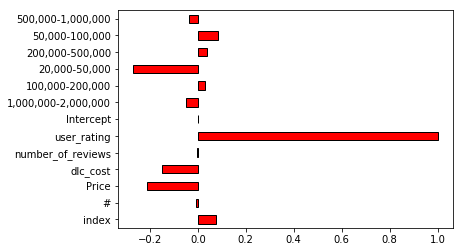

In [115]:
Steam_games_dumb_df.corr()['user_rating'].plot.barh(color='red', edgecolor='black')
print(Steam_games_dumb_df.corr()['user_rating'].sort_values())
plt.show

In [49]:
# STUDENT SECTION
# Define the model removing X2, X4, and X5
lm2 = smf.ols('user_rating ~ Price + dlc_cost', data=Steam_games_df)
# Fit the model
fit2 = lm2.fit()
# Check out the results
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            user_rating   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.103
Date:                Tue, 24 Apr 2018   Prob (F-statistic):              0.129
Time:                        15:06:04   Log-Likelihood:                -368.53
No. Observations:                  86   AIC:                             743.1
Df Residuals:                      83   BIC:                             750.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.2289      2.388     33.176      0.000      74.479      83.979
Price         -0.1971      0.130     -1.520      0.132      -0.455       0.061
dlc_cost      -0.0733      0.145     -0.504      0.615      -0.362       0.216
==============================================================================
Omnibus:                        9.120   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.659
Skew:                          -0.821   Prob(JB):                      0.00799
Kurtosis:                       2.989   Cond. No.                         29.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# STUDENT SECTION
# Define the model removing X2, X4, and X5
lm2 = smf.ols('user_rating ~ Price', data=Steam_games_dumb_df)
# Fit the model
fit2 = lm2.fit()
# Check out the results
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            user_rating   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.987
Date:                Tue, 24 Apr 2018   Prob (F-statistic):             0.0491
Time:                        18:35:20   Log-Likelihood:                -368.66
No. Observations:                  86   AIC:                             741.3
Df Residuals:                      84   BIC:                             746.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.1574      2.373     33.353      0.000      74.438      83.877
Price         -0.2277      0.114     -1.997      0.049      -0.455      -0.001
==============================================================================
Omnibus:                        8.804   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.316
Skew:                          -0.806   Prob(JB):                      0.00949
Kurtosis:                       2.953   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
delete = ["index", "Score rank(Userscore / Metascore", "#", "Release date"]
Steam_games_dumb_df = Steam_games_dumb_df.drop(columns=["index", "Score rank(Userscore / Metascore)", "#", "Release date"])

In [81]:
Steam_games_dumb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 98
Data columns (total 17 columns):
index                                86 non-null int64
#                                    86 non-null int64
Game                                 86 non-null object
Release date                         86 non-null object
Price                                86 non-null float64
Score rank(Userscore / Metascore)    86 non-null object
Owners                               86 non-null object
dlc_cost                             86 non-null float64
number_of_reviews                    86 non-null int64
user_rating                          86 non-null int64
Release_date                         86 non-null datetime64[ns]
1,000,000-2,000,000                  86 non-null uint8
100,000-200,000                      86 non-null uint8
20,000-50,000                        86 non-null uint8
200,000-500,000                      86 non-null uint8
50,000-100,000                       86 non-null uint8


In [103]:
Steam_games_dumb_df.to_pickle('/Users/NickThomas/Project_Luther/data/Steam_games_dumb_df.pkl')

In [102]:
Steam_games_dumb_df

,Game,Price,Owners,dlc_cost,number_of_reviews,user_rating,Release_date,"1,000,000-2,000,000","100,000-200,000","20,000-50,000","200,000-500,000","50,000-100,000","500,000-1,000,000"
0,Friday the 13th: Killer Puzzle,0.00,"100,000 .. 200,000",18.89,1184,95,2018-04-12,0,1,0,0,0,0
1,Radical Heights,0.00,"1,000,000 .. 2,000,000",14.99,7365,57,2018-04-10,1,0,0,0,0,0
2,Farm Manager 2018,19.99,"20,000 .. 50,000",12.95,276,62,2018-04-06,0,0,1,0,0,0
3,Mirror,1.19,"200,000 .. 500,000",2.38,982,96,2018-04-19,0,0,0,1,0,0
4,Minit,9.99,"0 .. 20,000",0.00,221,94,2018-04-03,0,0,0,0,0,0
5,Welcome to the Game II,9.99,"0 .. 20,000",0.00,389,79,2018-04-03,0,0,0,0,0,0
6,PC Building Simulator,19.99,"50,000 .. 100,000",0.00,1983,91,2018-03-27,0,0,0,0,1,0
7,PixARK,24.99,"100,000 .. 200,000",0.00,2490,65,2018-03-27,0,1,0,0,0,0
8,Far Cry 5,59.99,"500,000 .. 1,000,000",39.98,16281,70,2018-03-26,0,0,0,0,0,1
9,PWND,0.00,"100,000 .. 200,000",0.00,564,73,2018-04-06,0,1,0,0,0,0
